In [2]:
print("NAME:- RAMESH BHUTKA")
print("SAP ID:- 5300419003")

NAME:- RAMESH BHUTKA
SAP ID:- 5300419003


In [3]:
import datetime
print(datetime.datetime.now())

2021-05-06 06:26:00.254848


# practical-5-x-or-problem

Use the "Run" button to execute the code.

In [4]:
!pip install jovian --upgrade --quiet

In [5]:
import jovian

In [6]:
# Execute this to save new versions of the notebook
jovian.commit(project="practical-5-x-or-problem")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-5-x-or-problem


'https://jovian.ai/rameshbhutka11/practical-5-x-or-problem'

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# creating dataset
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [9]:
# callback to stop training when validation accuracy is 100%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try:
            if logs.get('val_accuracy') == 1.0:
                print("\nReached 100% accuracy, stopping training")
                self.model.stop_training = True
        except:
            pass
        return

callbacks = myCallback()

In [10]:
# creating tensorflow model
model = tf.keras.models.Sequential([
        # input layer
        tf.keras.layers.Dense(2, input_shape = (2,), activation='relu'),
        # hidden layer
        tf.keras.layers.Dense(4, activation='relu'),
        # output neuron
        tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [12]:
# training the model
# tf.random.set_seed(17)
history = model.fit(
        x, y,
        epochs = 5000,
        validation_data = (x, y),
        callbacks = [callbacks]
        )

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.2500
Epoch 2/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.6939 - accuracy: 0.2500 - val_loss: 0.6938 - val_accuracy: 0.2500
Epoch 3/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.6938 - accuracy: 0.2500 - val_loss: 0.6936 - val_accuracy: 0.2500
Epoch 4/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.6936 - accuracy: 0.2500 - val_loss: 0.6935 - val_accuracy: 0.2500
Epoch 5/5000
1/1 [==============================] - 0s 55ms/step - loss: 0.6935 - accuracy: 0.2500 - val_loss: 0.6935 - val_accuracy: 0.2500
Epoch 6/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.6935 - accuracy: 0.2500 - val_loss: 0.6934 - val_accuracy: 0.2500
Epoch 7/5000
1/1 [==============================] - 0s 56ms/step - loss: 0.6934 - accuracy: 0.2500 - val_loss: 0.6933 - val_accuracy: 0.2500
Epoch 8/5000
1/

In [13]:
print(f"Loss : {model.evaluate(x,y)[0]}")
print(f"Accuracy % : {model.evaluate(x,y)[1]*100}")

1/1 [==============================] - 0s 17ms/step - loss: 0.6405 - accuracy: 1.0000
Loss : 0.640494167804718
1/1 [==============================] - 0s 16ms/step - loss: 0.6405 - accuracy: 1.0000
Accuracy % : 100.0


In [14]:
predictions = model.predict_classes(x)
predictions = predictions.reshape(1,-1)[0]

# confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y, predictions), sep='')
print(f'Accuracy Score: {accuracy_score(y, predictions)*100}%')

Confusion Matrix:
[[2 0]
 [0 2]]
Accuracy Score: 100.0%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
# verifying outputs manually
for i in range(len(x)):
    print(f'{x[i]}\t\t{predictions[i]}')

[0 0]		0
[0 1]		1
[1 0]		1
[1 1]		0


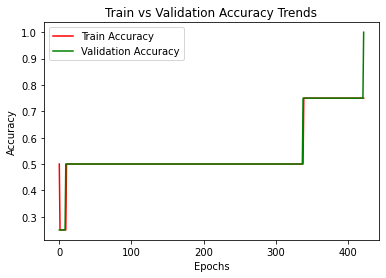

In [17]:
# train and validation accuracy trends
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = [i for i in range(0, 423)]
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
jovian.commit(project="practical-5-x-or-problem")


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/rameshbhutka11/practical-5-x-or-problem


'https://jovian.ai/rameshbhutka11/practical-5-x-or-problem'